# Events: Matrix-Element 


## 1. Software: `MadGraph`

`Madgraph` is a framework that aims at providing all the elements necessary for SM and BSM phenomenology, such as the computations of cross sections, the generation of hard events and their matching with event generators, and the use of a variety of tools relevant to event manipulation and analysis. Processes can be simulated to (N)LO accuracy for any user-defined Lagrangian, with some limitations beyond tree-level accuracy. Matrix elements at the tree- and one-loop-level can also be obtained (source: https://cp3.irmp.ucl.ac.be/projects/madgraph/)


## 2. The `MadGraph` Run card

The `run_card.dat` file is the core of the MC simulation. It is where the user can control the kinematics in the scattering process of a particular run. The most relevant parameters fall into two categories: 

1. **Generation-level parameters**: these parameters control the scattering for the initial states, e.g. the energies of the beam, the choice of the PDF set, wether to collide protons or leptons, etc.

2. **Parton-level cuts**: these parameters pretty much define the region of phase-space that you want your events to be sampled from. They correspond to various kinematic cuts on the final state particles. *Warning! These cuts are not to be confused with the cuts in an experimental search! Those come much later after events shower and final state objects are reconstructed.* Parton-level cuts, however, are important because they can enhance the statistics in a particular region of interest explored by a specific search.

The overall structure of the run_card is the following (I removed some of the less common parameters for readability):


    #*********************************************************************
    #                       MadGraph5_aMC@NLO                            *
    #                                                                    *
    #                     run_card.dat MadEvent                          *
    #                                                                    *
    #  This file is used to set the parameters of the run.               *
    #                                                                    *
    #  mind the format:   value    = variable     ! comment              *
    #*********************************************************************
                                                              
   
        tag_1    = run_tag                   ! name of the run     
        10000    = nevents                   ! Number of unweighted events requested 
        0        = iseed                     ! rnd seed (0=assigned automatically=default))

        1        = lpp1                      ! beam 1 type                                          
        1        = lpp2                      ! beam 2 type
        6500.0   = ebeam1                    ! beam 1 total energy in GeV
        6500.0   = ebeam2                    ! beam 2 total energy in GeV
    
        nn23lo1  = pdlabel                   ! PDF set                                     
        230000   = lhaid                     ! if pdlabel=lhapdf, this is the lhapdf number

        False    = fixed_ren_scale           ! if .true. use fixed ren scale
        False    = fixed_fac_scale           ! if .true. use fixed fac scale
        91.188   = scale                     ! fixed ren scale
        91.188   = dsqrt_q2fact1             ! fixed fact scale for pdf1
        91.188   = dsqrt_q2fact2             ! fixed fact scale for pdf2
        -1       = dynamical_scale_choice    ! Choose one of the preselected dynamical choices
        1.0      = scalefact                 ! scale factor for event-by-event scales


    #*******************************                                                 
    # Parton level cuts definition *
    #*******************************                                     
            
        10.0  = ptl             ! minimum pt for the charged leptons 
       -1.0   = ptlmax          ! maximum pt for the charged leptons
        {}    = pt_min_pdg      ! pt cut for other particles (use pdg code). Applied on particle and anti-particle
        {}	  = pt_max_pdg      ! pt cut for other particles (syntax e.g. {6: 100, 25: 50}) 
    
        2.5   = etal            ! max rap for the charged leptons 
        0.0   = etalmin         ! main rap for the charged leptons
        {}    = eta_min_pdg     ! rap cut for other particles (use pdg code). Applied on particle and anti-particle
        {}    = eta_max_pdg     ! rap cut for other particles (syntax e.g. {6: 2.5, 23: 5})
 
        0.4  = drll             ! min distance between leptons 
       -1.0  = drllmax          ! max distance between leptons

        0.0  = mmll             ! min invariant mass of l+l- (same flavour) lepton pair
       -1.0  = mmllmax          ! max invariant mass of l+l- (same flavour) lepton pair
        {}   = mxx_min_pdg      ! min invariant mass of a pair of particles X/X~ (e.g. {6:250})

        0.0  = mmnl             ! min invariant mass for all letpons (l+- and vl) 
       -1.0  = mmnlmax          ! max invariant mass for all letpons (l+- and vl) 

        0.0  = ptllmin          ! Minimum pt for 4-momenta sum of leptons(l and vl)
       -1.0  = ptllmax          ! Maximum pt for 4-momenta sum of leptons(l and vl)

        0.0  = xptl             ! minimum pt for at least one charged lepton 

        0.0  = ptl1min          ! minimum pt for the leading lepton in pt
        0.0  = ptl2min          ! minimum pt for the second lepton in pt
       -1.0  = ptl1max          ! maximum pt for the leading lepton in pt 
       -1.0  = ptl2max          ! maximum pt for the second lepton in pt

    #*********************************************************************
    # maximal pdg code for quark to be considered as a light jet         *
    # (otherwise b cuts are applied)                                     *
    #*********************************************************************

        4 = maxjetflavor    ! Maximum jet pdg code 
   

## 3. Parton-level events: The `LHE` file

Madgraph generates parton-level events. These are stored in the *Les Houches Event* (LHE) format in a file with (default) name: 

    unweighted_events.lhe

It can be found in the `Events/run_01` folder. The data file consists of generated events (the number specified by `nevents`). A single event is composed of the kinematics features and other characteristic of the scattering states, e.g. the two initial partons, the final undecayed states and also the intermediate states that decayed:


    <event>
    4     1 +8.3911000e+02 8.93683800e+01 7.54677100e-03 1.30438800e-01
          2  -1    0    0  501    0  +0.0000000000e+00  +0.0000000000e+00  +7.4318030872e+01  7.4318030872e+01  0.0000000000e+00  0.0000e+00 -1.0000e+00       
         -2  -1    0    0    0  501  -0.0000000000e+00  -0.0000000000e+00  -2.6866655940e+01  2.6866655940e+01  0.0000000000e+00  0.0000e+00  1.0000e+00       
        -13   1    1    2    0    0  -6.9396665975e+00  +2.7744220552e+01  -1.5147179771e+01  3.2362598807e+01  0.0000000000e+00  0.0000e+00  1.0000e+00       
         13   1    1    2    0    0  +6.9396665975e+00  -2.7744220552e+01  +6.2598554703e+01  6.8822088005e+01  0.0000000000e+00  0.0000e+00 -1.0000e+00       
    <mgrwt>
    <rscale>  0 0.89368383E+02</rscale>
    <asrwt>0</asrwt>
    <pdfrwt beam="1">  1        2 0.11433543E-01 0.89368383E+02</pdfrwt>
    <pdfrwt beam="2">  1       -2 0.41333317E-02 0.89368383E+02</pdfrwt>
    <totfact> 0.11893024E+05</totfact>
    </mgrwt>
    </event>

- In this case you can see the Drell-Yan scattering $d\bar d\to \mu^+\mu^-$. Here's a breakdown of the columns for each particle in an LHE event:

    - 1: `PDG ID`, this indicates the particle type. For example, `-13` denotes a anti-muon $\mu^+ $, and `13` denotes a muon ($\mu^-$).
    - 2: `status`, this refers to the particle's status (initial state `-1`, intermediate state, final state `1`).
    - 3-4: `mother1` and `mother2`, indices for the particle's mother particles.
    - 5-6: `color flow`, describes the flow of color charge (relevant for QCD processes).
    - 7-10: `px, py, pz, E`, 4-momentum components of the particle
    - 11: `m`, particle's mass (all massless in the example above).
    - 12: nothing. 
    - 13: `spin`, particle's spin/helicity information.




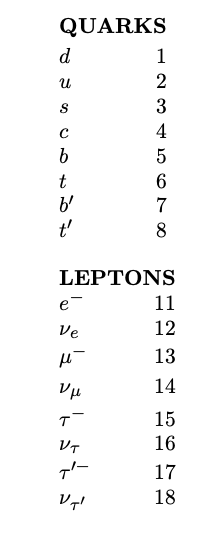

## 4. Example: SM Drell-Yan production $pp\to \mu^+\mu^-$

Since LHE files are human-readable, we can parse through them with a simple python code that reads the events line-by-line.
You can import the method `get_LHE_events` to get the list of events in the LHE file. Only the final states information are stored.


In [ ]:

from BSMhighPT2023.utils import get_LHE_events

lhe_file = '../RUNS/PROC_dimuon_SM/Events/run_01/unweighted_events.lhe'

#...look at the first 10 events

events =  get_LHE_events(path=lhe_file)

for states in events:
    
    #...process event here:

    print(states)

    pass
        

### Kinematics 

Compute the $p_T$ distribution of one of the muons and plot the histogram:

In [ ]:
import numpy as np

pt_mu = []

for states in events:
    
    #...process event here:

    mu = states[0] # leading muon
    pt = np.sqrt( mu[0]**2 + mu[1]**2)
    pt_mu.append(pt)

    pass


In [ ]:
import matplotlib.pyplot as plt

#...pt of muon

fig, ax = plt.subplots(1,1, figsize=(3,3))
ax.hist(pt_mu, bins=np.arange(20,75, 2), histtype='step', color='k', density=True)
ax.set_xlabel(r'leading muon $p_T$ [GeV]')
ax.set_ylabel('density')
ax.set_xlim(20,100)
plt.show()

# Task 1

Compute and get histograms for the following distributions:
- the dimuon invariant mass distribution $m_{\mu\mu}$.
- the pseudorapidity differnce of the dimuons $\Delta{\eta}=\eta_{\mu_1}-\eta_{\mu_2}$.
- the azimuthal angle differnce of the dimuons $\Delta{\phi}=\phi_{\mu_1}-\phi_{\mu_2}$.
- the plane distance between muons $\Delta R=\sqrt{\Delta\eta^2 +\Delta\phi^2}$
